In [1]:
import pandas as pd
import os

dir_path = "../.."
#dir_path = "e2_results"
file_data = "Out_E2_bis-FaceAll.csv"

colnames = ['dataset', 'num', 'num_data_pts', 'num_outliers_removed','num_coeffs','method','max_dist', 'MSE', 'MAE','mean_diff', 'max_fst_derivative', 'max_snd_derivative','min_fst_derivative','min_snd_derivative','avg_fst_derivative','avg_snd_derivative']
e2 = pd.read_csv(os.path.join(dir_path, file_data), names=colnames, header=None).drop_duplicates()
e2

,dataset,num,num_data_pts,num_outliers_removed,num_coeffs,method,max_dist,MSE,MAE,mean_diff,max_fst_derivative,max_snd_derivative,min_fst_derivative,min_snd_derivative,avg_fst_derivative,avg_snd_derivative
0,Adiac,0,176,0,52,L8,0.011749,0.000076,0.007802,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
1,Adiac,0,176,0,52,L8 and L1,0.011749,0.000044,0.005083,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
2,Adiac,0,176,0,52,LSQ,0.016260,0.000032,0.004356,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
3,Adiac,0,176,0,52,PAA,0.151207,0.011046,0.091971,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
4,Adiac,0,176,0,52,PLA,0.018072,0.000170,0.011520,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164240,FaceAll,480,131,0,39,LSQ,1.127334,0.180190,0.325737,-0.500000,0.007692,0.000000,0.007692,-0.000000,0.007692,-0.0
164241,FaceAll,480,131,0,39,PAA,1.877660,2.303866,1.428309,-0.500000,0.007692,0.000000,0.007692,-0.000000,0.007692,-0.0
164242,FaceAll,480,131,0,39,PLA,1.330483,0.590413,0.599581,-0.500000,0.007692,0.000000,0.007692,-0.000000,0.007692,-0.0
164243,FaceAll,480,131,0,39,DFT,2.073447,0.242732,0.360583,-0.500000,0.007692,0.000000,0.007692,-0.000000,0.007692,-0.0


# for each method: accuracy measures (max_dist, MSE, MAE)
Question: How does our method compare to other methods for time series approximation and/or compression? Can it be improved by including an L1 fitting?

In [2]:
import pandas as pd
#pd.set_option('display.float_format', '{:.8f}'.format)
mean_values = e2.groupby('method').agg({'max_dist': 'mean', 'MSE': 'mean', 'MAE': 'mean'}).reset_index()
mean_values

,method,max_dist,MSE,MAE
0,DFT,1.905707,0.473041,0.396016
1,L8,0.921915,1.064689,0.630207
2,L8 and L1,0.921911,0.741374,0.457184
3,LSQ,1.367274,0.216162,0.209831
4,PAA,1.252698,2.651103,1.111816
5,PLA,1.005723,0.507378,0.442174


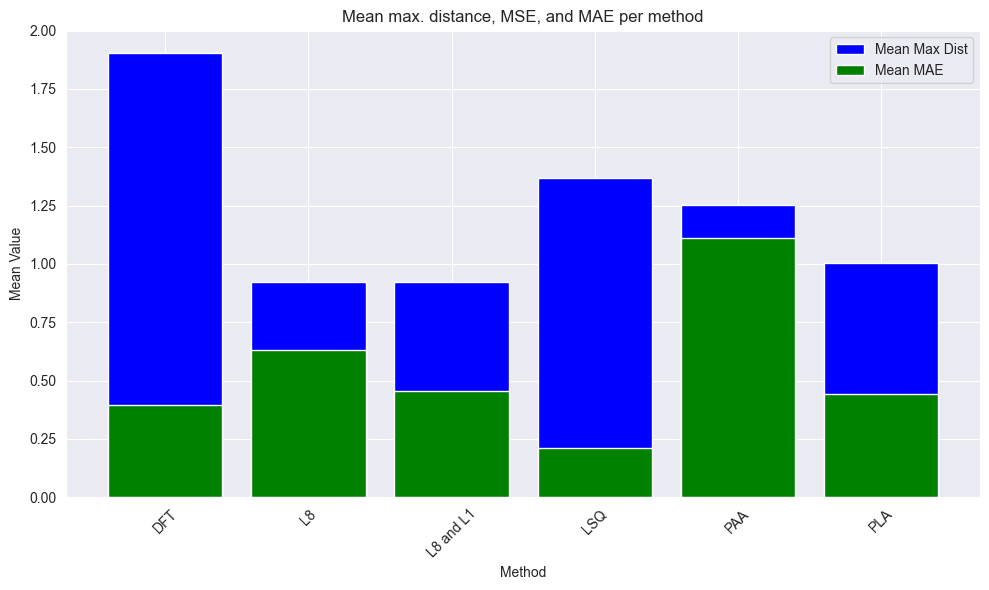

In [3]:
import matplotlib.pyplot as plt

# Plot mean values
plt.figure(figsize=(10, 6))

plt.bar(mean_values['method'], mean_values['max_dist'], color='b', label='Mean Max Dist')
plt.bar(mean_values['method'], mean_values['MAE'],color='g', label='Mean MAE')
#plt.bar(mean_values['method'], mean_values['MSE'],color='r', label='Mean MSE')
plt.xlabel('Method')
plt.ylabel('Mean Value')
plt.title('Mean max. distance, MSE, and MAE per method')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

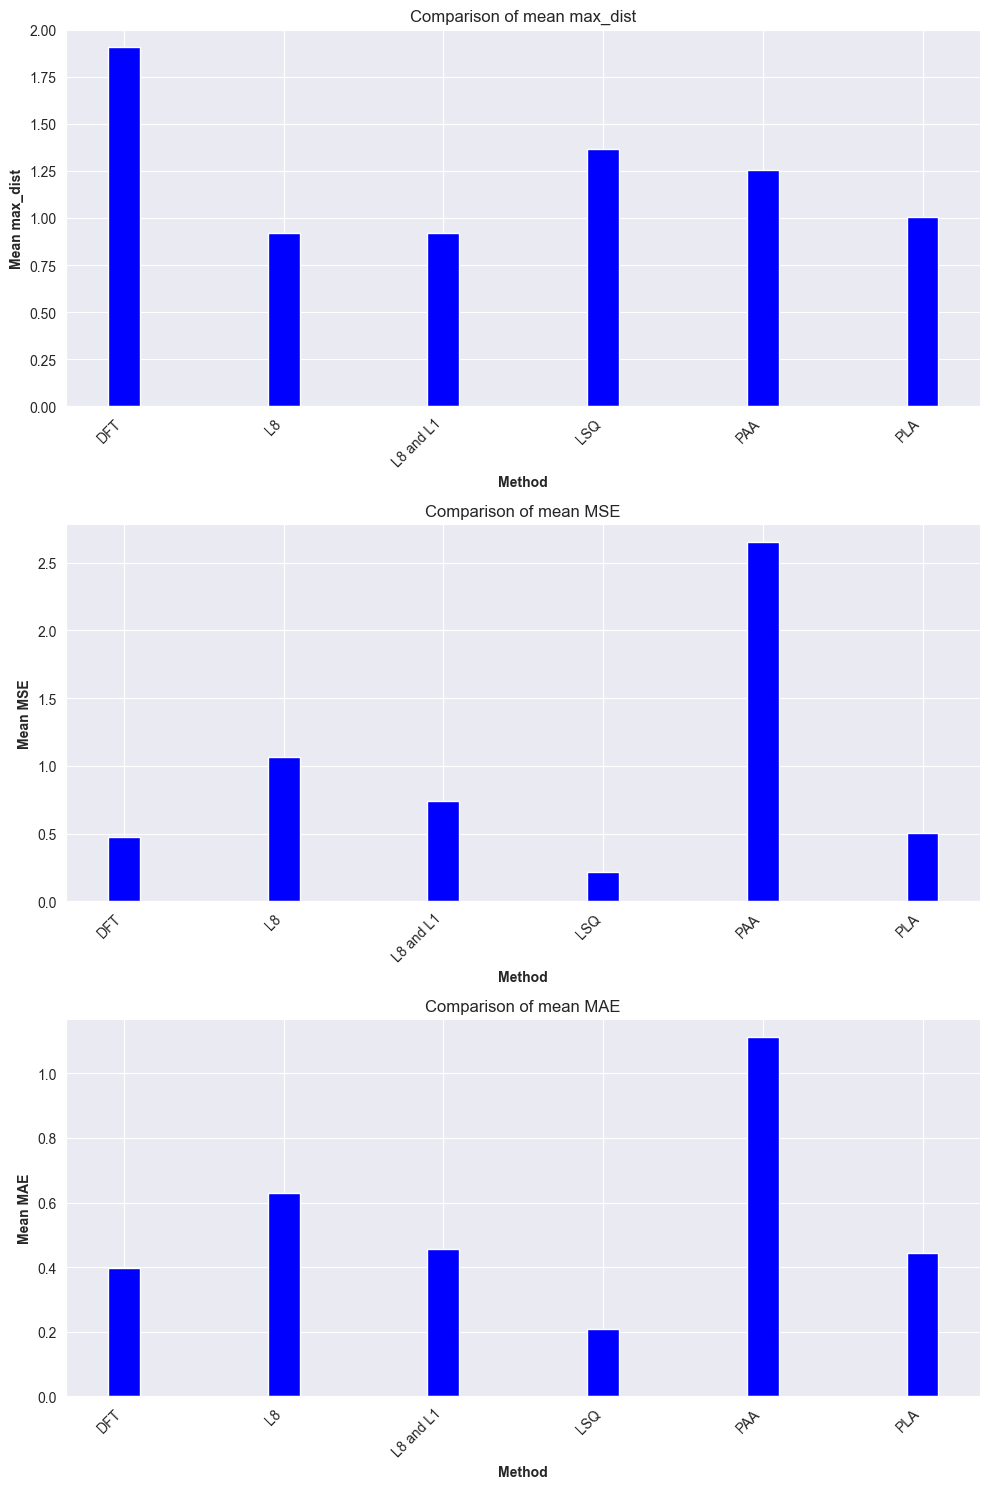

In [4]:
import matplotlib.pyplot as plt
import numpy as np

methods = mean_values['method']
metrics = ['max_dist','MSE', 'MAE', ]

bar_width = 0.2
num_methods = len(methods)
r = np.arange(num_methods)

fig, axs = plt.subplots(len(metrics), figsize=(10, 15))

for i, metric in enumerate(metrics):
    mean_val = mean_values[metric]
    metric_without_outliers = mean_values[f'{metric}']

    r1 = r + bar_width/2

    axs[i].bar(r1, mean_val, color='b', width=bar_width)#, label='?')

    axs[i].set_xlabel('Method', fontweight='bold')
    axs[i].set_ylabel(f'Mean {metric}', fontweight='bold')
    axs[i].set_xticks([r + bar_width/2 for r in range(num_methods)])
    axs[i].set_xticklabels(methods, rotation=45, ha='right')
    axs[i].set_title(f'Comparison of mean {metric}')
    #axs[i].legend()

plt.tight_layout()
plt.show()

# for each method: outliers vs. no outliers
Question: Does the removal of outliers increase the accuracy of the approximated time series? 
(If so: outliers need to be saved separately!)

In [5]:
df_no_outliers = e2[e2['num_outliers_removed'] > 0]
print(len(df_no_outliers.index))
df_with_outliers = e2[e2['num_outliers_removed'] == 0]
print(len(df_with_outliers.index))

mean_values_no_outliers = df_no_outliers.groupby('method').agg({
    'max_dist': 'mean',
    'MSE': 'mean', 
    'MAE': 'mean'}).reset_index()
mean_values_no_outliers.rename(columns={
    'max_dist': 'max_dist w/o outliers', 
    'MSE': 'MSE w/o outliers', 
    'MAE': 'MAE w/o outliers'}, inplace=True)

mean_values_with_outliers = df_with_outliers.groupby('method').agg({
    'max_dist': 'mean', 
    'MSE': 'mean', 
    'MAE': 'mean'}).reset_index()

mean_values_with_outliers.rename(columns={
    'max_dist': 'max_dist', 
    'MSE': 'MSE', 
    'MAE': 'MAE'}, inplace=True)

mean_values_combined = pd.merge(mean_values_with_outliers, mean_values_no_outliers, on='method', how='outer')
mean_values_combined

77005
87240


,method,max_dist,MSE,MAE,max_dist w/o outliers,MSE w/o outliers,MAE w/o outliers
0,DFT,1.952374,0.408722,0.333837,1.852836,0.545909,0.466462
1,L8,1.388025,1.807292,0.941804,0.393886,0.223439,0.277217
2,L8 and L1,1.388025,1.239778,0.671157,0.393836,0.176718,0.214768
3,LSQ,2.081253,0.310009,0.264802,0.558387,0.109840,0.147554
4,PAA,1.858717,4.580939,1.685604,0.566123,0.464736,0.461754
5,PLA,1.515046,0.746025,0.571885,0.428697,0.237007,0.295221


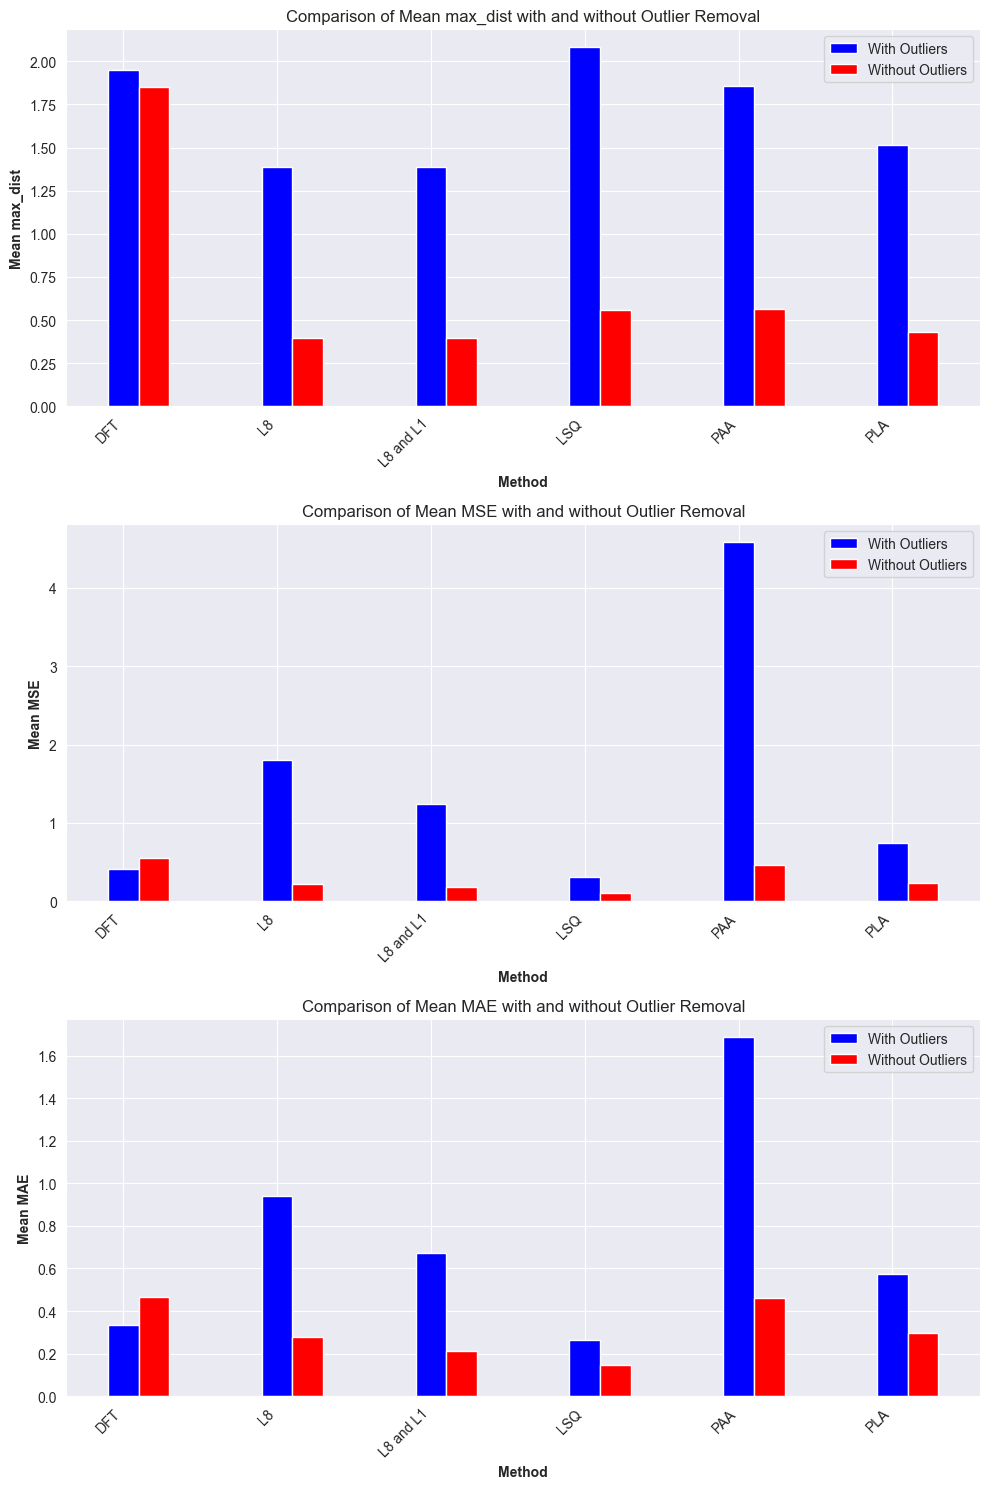

In [6]:
import matplotlib.pyplot as plt
import numpy as np

methods = mean_values_combined['method']
metrics = ['max_dist','MSE', 'MAE']

bar_width = 0.2
num_methods = len(methods)
r = np.arange(num_methods)

fig, axs = plt.subplots(len(metrics), figsize=(10, 15))

for i, metric in enumerate(metrics):
    metric_with_outliers = mean_values_combined[metric]
    metric_without_outliers = mean_values_combined[f'{metric} w/o outliers']

    r1 = r + bar_width/2
    r2 = [x + bar_width for x in r1]

    axs[i].bar(r1, metric_with_outliers, color='b', width=bar_width, label='With Outliers')
    axs[i].bar(r2, metric_without_outliers, color='r', width=bar_width, label='Without Outliers')

    axs[i].set_xlabel('Method', fontweight='bold')
    axs[i].set_ylabel(f'Mean {metric}', fontweight='bold')
    axs[i].set_xticks([r + bar_width/2 for r in range(num_methods)])
    axs[i].set_xticklabels(methods, rotation=45, ha='right')
    axs[i].set_title(f'Comparison of Mean {metric} with and without Outlier Removal')
    axs[i].legend()

plt.tight_layout()
plt.show()

# for L8-L1: correlation between accuracy measures and time series properties
Question: Does our method approximate time series with certain properties more/less accurately?

In [ ]:
df_max_l1 = e2[e2['method'] == 'L8 and L1']

In [7]:
correlation_matrix = df_max_l1[
    ['max_dist', 'MSE', 'MAE', 'num_data_pts', 'mean_diff', 'max_fst_derivative', 'max_snd_derivative']].corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,max_dist,MSE,MAE,num_data_pts,mean_diff,max_fst_derivative,max_snd_derivative
max_dist,1.000000,0.912880,0.937137,-0.056164,0.323193,-0.373056,-0.382021
MSE,0.912880,1.000000,0.919747,-0.151404,0.207293,-0.245496,-0.260307
MAE,0.937137,0.919747,1.000000,-0.195710,0.313302,-0.340963,-0.360730
num_data_pts,-0.056164,-0.151404,-0.195710,1.000000,0.163289,-0.221576,-0.139322
mean_diff,0.323193,0.207293,0.313302,0.163289,1.000000,-0.419497,-0.415100
max_fst_derivative,-0.373056,-0.245496,-0.340963,-0.221576,-0.419497,1.000000,0.980658
max_snd_derivative,-0.382021,-0.260307,-0.360730,-0.139322,-0.415100,0.980658,1.000000


In [8]:
df_max_l1.iloc[:,2:]

,num_data_pts,num_outliers_removed,num_coeffs,method,max_dist,MSE,MAE,mean_diff,max_fst_derivative,max_snd_derivative,min_fst_derivative,min_snd_derivative,avg_fst_derivative,avg_snd_derivative
1,176,0,52,L8 and L1,0.011749,0.000044,0.005083,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
7,176,0,52,L8 and L1,0.012883,0.000032,0.003705,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
13,176,0,52,L8 and L1,0.011407,0.000031,0.003966,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
19,176,0,52,L8 and L1,0.023391,0.000103,0.006338,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
25,176,0,52,L8 and L1,0.021331,0.000128,0.008403,-0.500000,0.005714,0.000000,0.005714,-0.000000,0.005714,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164215,131,0,39,L8 and L1,0.642463,0.154282,0.312063,-0.500000,0.007692,0.000000,0.007692,-0.000000,0.007692,-0.0
164221,121,10,36,L8 and L1,0.473843,0.061493,0.182592,-0.385252,0.030769,0.023077,0.007692,-0.023077,0.008077,-0.0
164227,131,0,39,L8 and L1,0.543285,0.075088,0.203457,-0.500000,0.007692,0.000000,0.007692,-0.000000,0.007692,-0.0
164233,116,15,34,L8 and L1,0.652232,0.144994,0.295839,-0.462221,0.038462,0.030769,0.007692,-0.030769,0.008696,-0.0


In [9]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df_max_l1[['num_data_pts','method','max_dist','mean_diff','max_fst_derivative']],hue="method")
#sns.pairplot(df_max_l1[2:],hue="method")

Error in callback <function flush_figures at 0x0000026F510A8AE0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

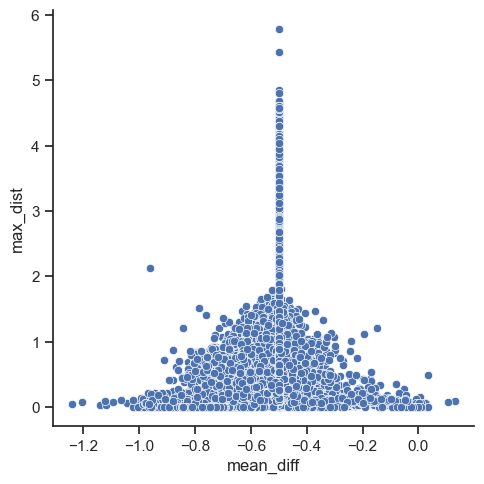

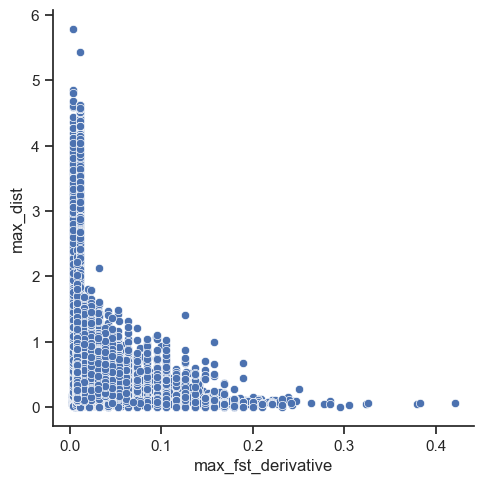

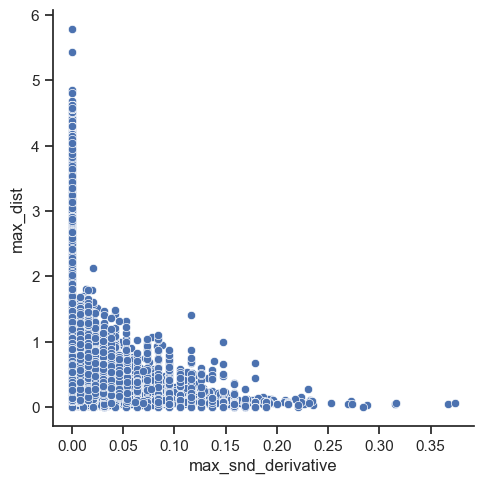

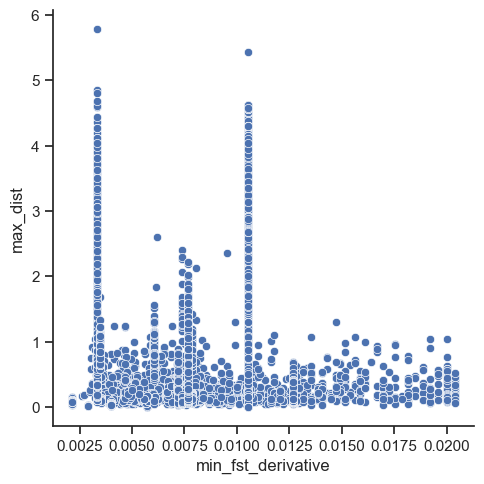

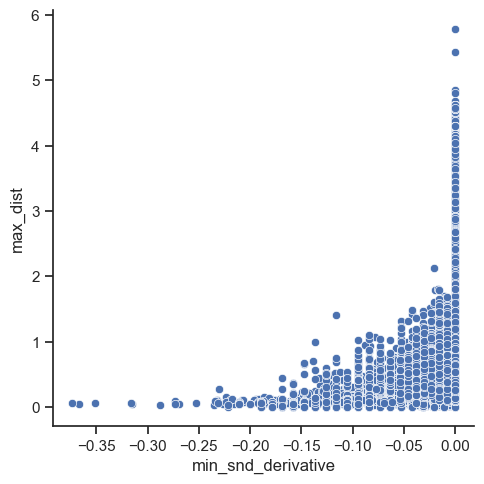

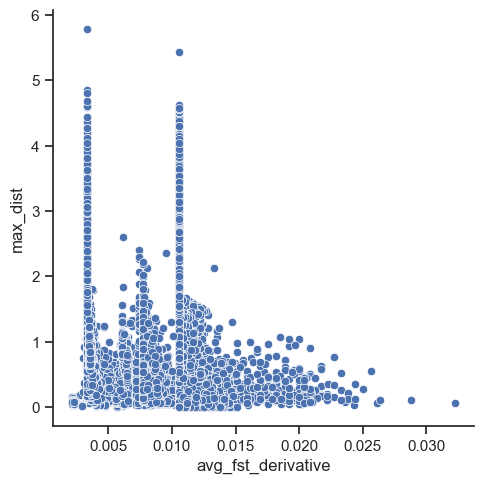

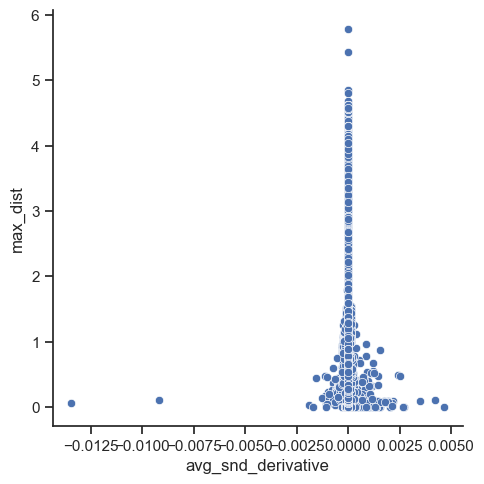

In [10]:
for measurement in ['mean_diff','max_fst_derivative','max_snd_derivative','min_fst_derivative','min_snd_derivative','avg_fst_derivative','avg_snd_derivative']:
    sns.relplot(data=df_max_l1, x=measurement, y="max_dist")

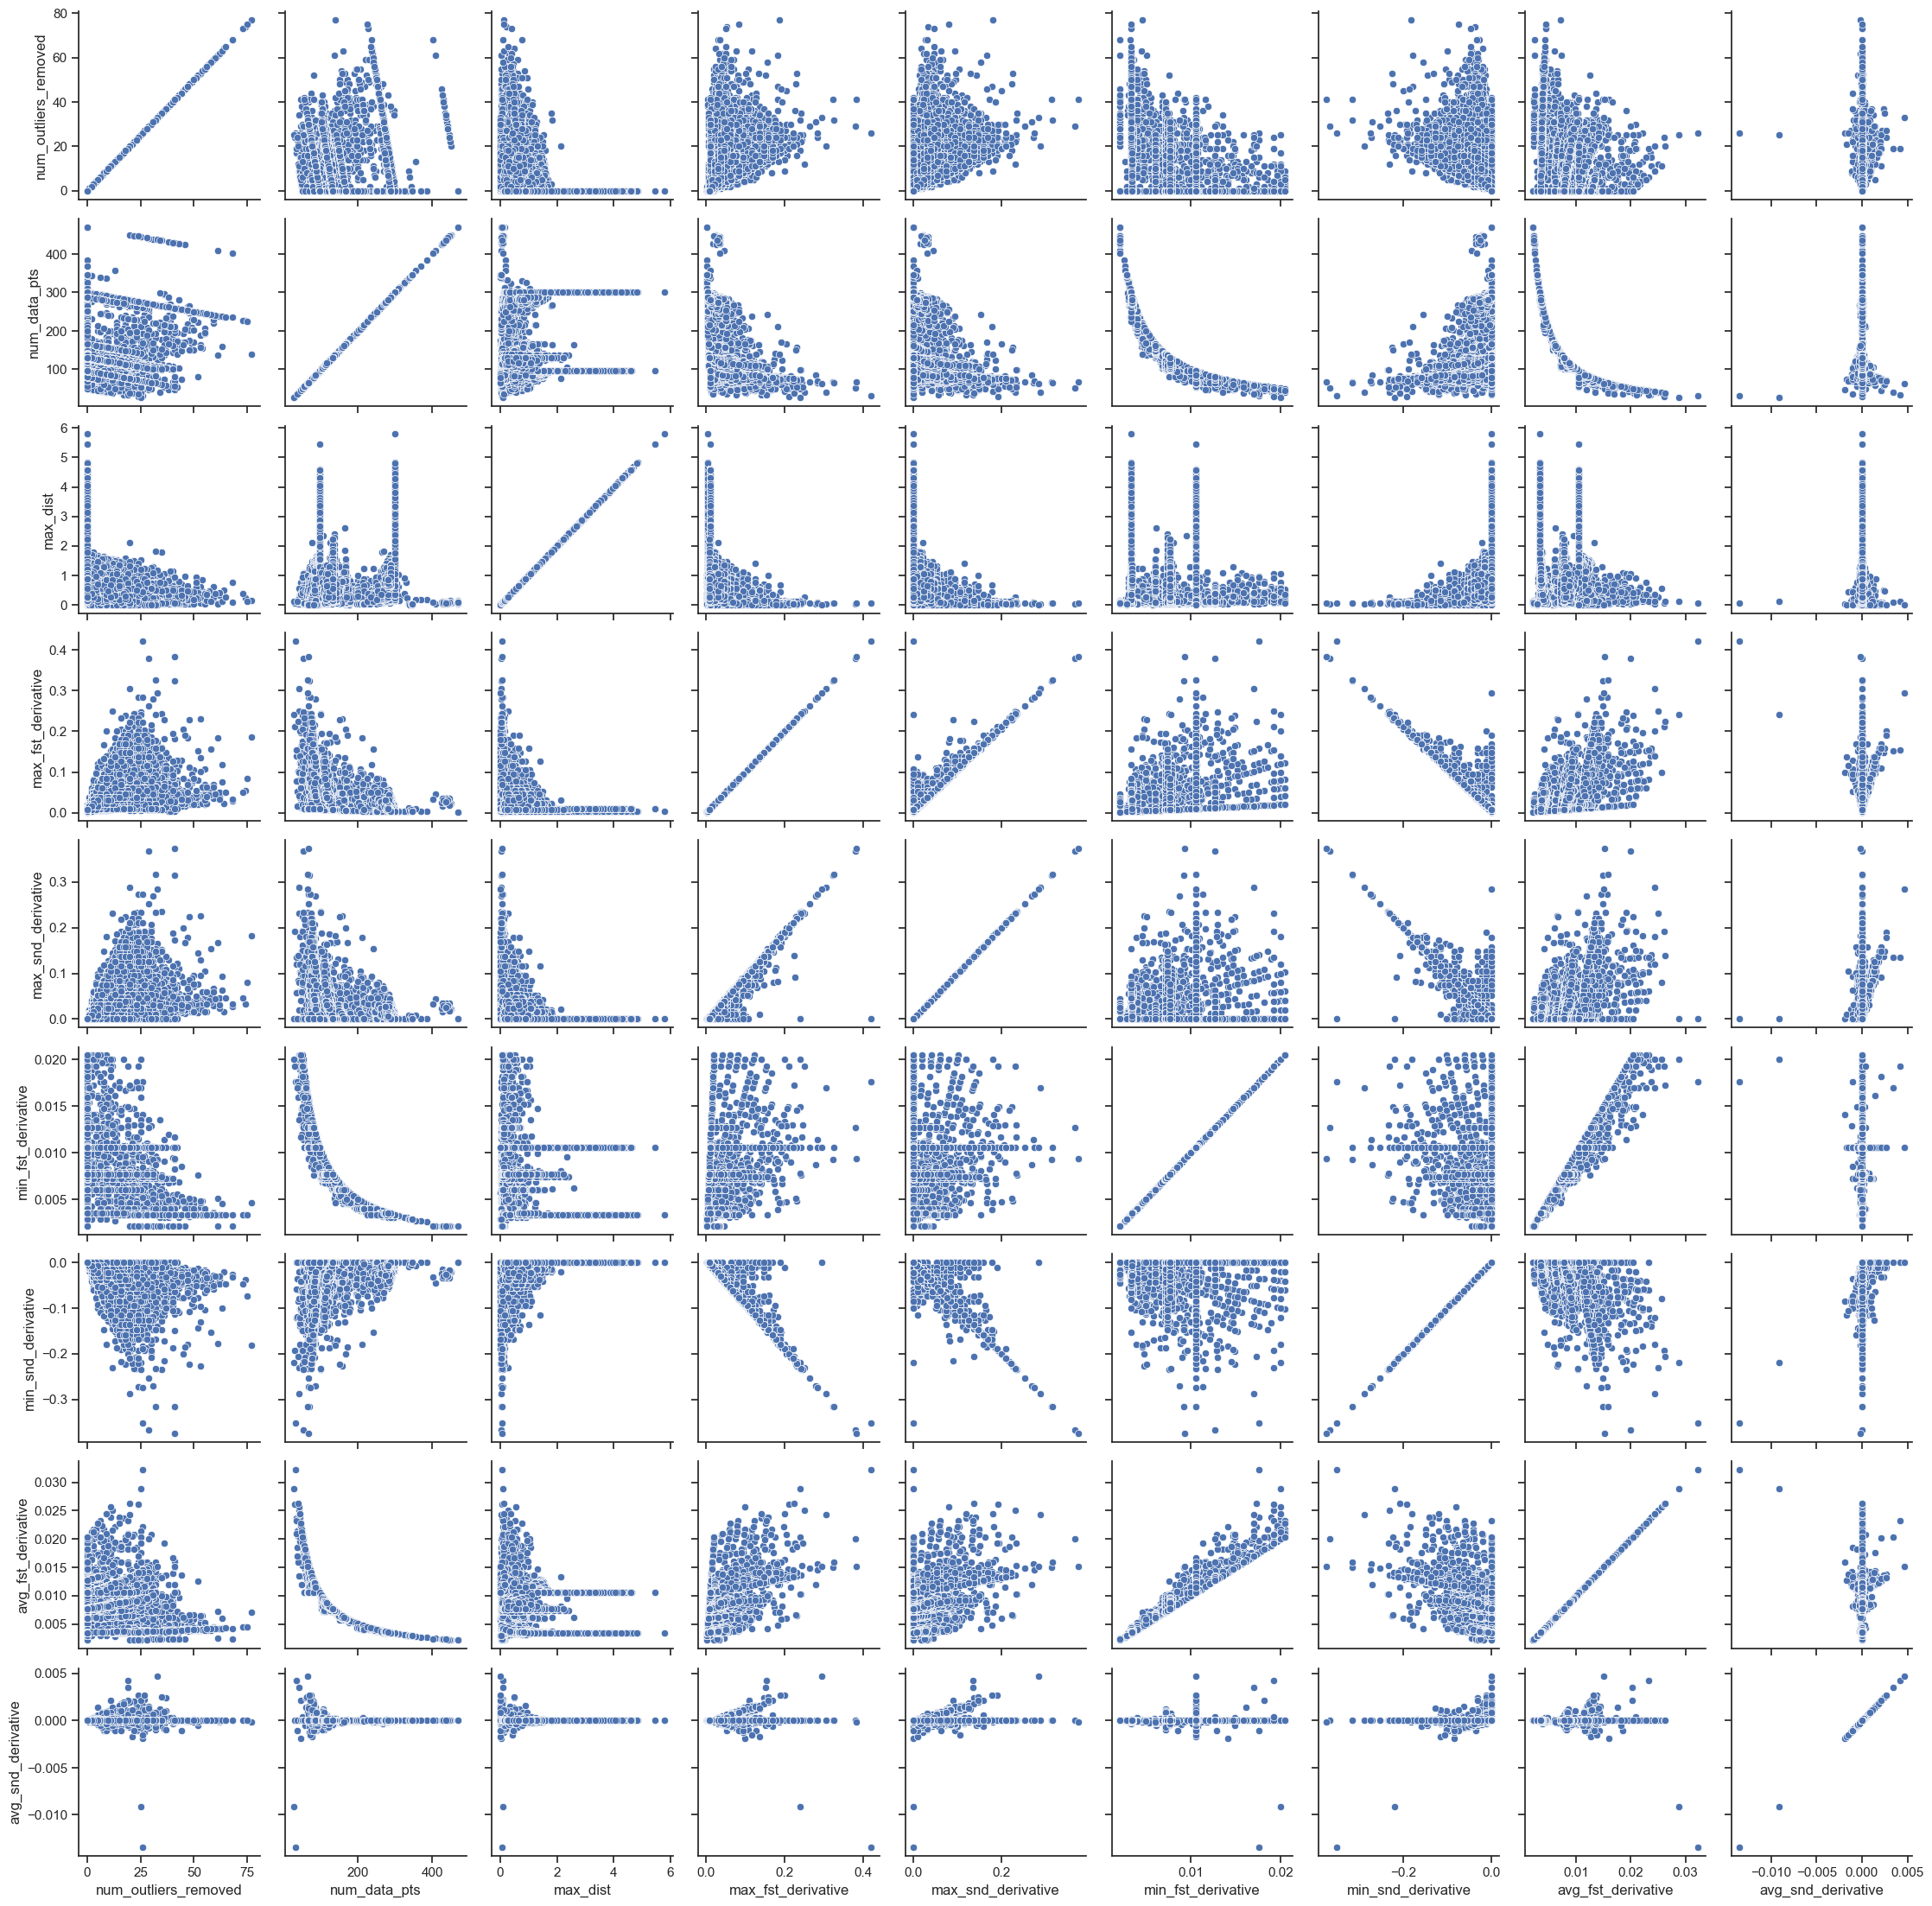

In [11]:
g = sns.PairGrid(df_max_l1[['num_outliers_removed','num_data_pts','max_dist','max_fst_derivative','max_snd_derivative','min_fst_derivative','min_snd_derivative','avg_fst_derivative','avg_snd_derivative']]).map(sns.scatterplot)

In [12]:
"""import seaborn as sns
sns.set_theme(style="ticks")
# for method in ['L8', 'L8 and L1', 'LSQ', 'PAA', 'PLA', 'DFT']:
df = e2[e2['method']=='L8 and L1']
#sns.pairplot(df[['num_data_pts','method','max_dist','mean_diff','max_fst_derivative']],hue="method")
sns.pairplot(df[2:],hue="method")"""

'import seaborn as sns\nsns.set_theme(style="ticks")\n# for method in [\'L8\', \'L8 and L1\', \'LSQ\', \'PAA\', \'PLA\', \'DFT\']:\ndf = e2[e2[\'method\']==\'L8 and L1\']\n#sns.pairplot(df[[\'num_data_pts\',\'method\',\'max_dist\',\'mean_diff\',\'max_fst_derivative\']],hue="method")\nsns.pairplot(df[2:],hue="method")'